In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Follow along with [this](https://www.youtube.com/watch?v=1yBPEPhq54M&list=WL&t=307) video

Symbols can be defined as follows:

In [2]:
x = smp.symbols('x')

In [3]:
x**2

x**2

In [4]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

In [5]:
z = y**2
z

(x**2 + 4*x + 3)**2

In [6]:
z.factor()

(x + 1)**2*(x + 3)**2

In [7]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [8]:
z.simplify()

(x**2 + 4*x + 3)**2

In [9]:
z.as_poly()

Poly(x**4 + 8*x**3 + 22*x**2 + 24*x + 9, x, domain='ZZ')

`smp.solve(f,x)` is how you solve $f(x) = 0$

In [10]:
smp.solve(z)

[-3, -1]

In [11]:
smp.solve(smp.sin(x),x)

[0, pi]

*Good practice:* If you know your variable is real (or non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems.

In [12]:
# Compare this example:
x = smp.symbols('x')
smp.solve(x**1 + 1, x)

[-1]

In [13]:
# To this example. Note how no output is given.
x = smp.symbols('x', real=True)
smp.solve(x**2+1, x)

[]

### Define many variables at once

In [14]:
x, y, z = smp.symbols('x y z')
F = x**2 + smp.sin(z)*y
F

x**2 + y*sin(z)

In [15]:
x_sols = smp.solve(F, x)
y_sols = smp.solve(F, y)
z_sols = smp.solve(F, z)
print("x solutions:",x_sols,"\ny solutions:",y_sols,"\nz solutions:",z_sols)

x solutions: [-sqrt(-y*sin(z)), sqrt(-y*sin(z))] 
y solutions: [-x**2/sin(z)] 
z solutions: [asin(x**2/y) + pi, -asin(x**2/y)]


How do I make a symbolic function into something I can graph?

Answer: Use `lambdify`!

In [16]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [17]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)
# note that this guy uses "_f" to denote that you are working with a function that you pass numbers to

3.6651914291880923

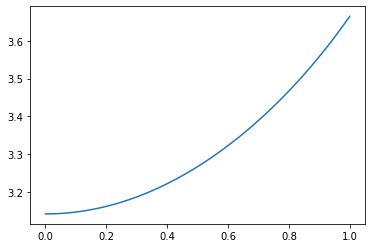

In [18]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

In [19]:
# For multivariable expressions, you can also substitute variables in
F

x**2 + y*sin(z)

In [20]:
F.subs([ (y,3) , (z,smp.pi/2) ])

x**2 + 3

In [21]:
F.subs([ (y,smp.cos(z)) , (z,smp.pi/2) ])

x**2